In [5]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import math
import numpy as np
import math
import numpy
import random
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models, Model
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap
import multiprocessing
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras import models, Model
import numpy as np

class DataSet():
    def __init__(self, num_words=None, seed=113, maxlen=100, train_portion=0.5, long_first=False):
        """
        :param num_words: Size of vocabulary, all words out-of-vocabulary will be marked as [unk]
        :param seed: Seed for randomly shuffling dataset
        :param maxlen: Maximum length of review, reviews longer than maxlen will be truncated, reviews shorter than
        maxlen will be padded to maxlen
        :param train_portion: Portion of dataset to allocate to training data, test data will be 1-train_portion
        :param long_first: Sort reviews by length
        """
        # retrieve IMDb data, x is a sequence containing movie review,
        # y is a label indicating if it is positive or negative sentiment
        (self.x_train, self.y_train), (self.x_test, self.y_test) = imdb.load_data(num_words=num_words, seed=seed)

        if long_first:
            self.y_train = [y for _, y in sorted(zip(self.x_train, self.y_train), key=lambda s: len(s[0]), reverse=True)]
            self.x_train = sorted(self.x_train, key=len, reverse=True)

            self.y_test = [y for _, y in sorted(zip(self.x_test, self.y_test), key=lambda s: len(s[0]), reverse=True)]
            self.x_test = sorted(self.x_test, key=len, reverse=True)

        self.total_length = [len(x) for x in self.x_train]
        temp = [len(x) for x in self.x_test]
        self.total_length.extend(temp)

        # padding sequences to all be of the same length
        self.x_train = pad_sequences(self.x_train, maxlen=maxlen, padding='post', truncating='post')
        self.x_test = pad_sequences(self.x_test, maxlen=maxlen, padding='post', truncating='post')

        self.split_data(train_portion)

        self.word_index = imdb.get_word_index()
        self.word_to_index = {word:id + 3 for word, id in self.word_index.items()}
        self.word_to_index["[pad]"] = 0
        self.word_to_index["[start]"] = 1
        self.word_to_index["[unk]"] = 2
        self.word_to_index["[unused]"] = 3
        self.index_to_word = {i:word for (word, i) in self.word_to_index.items()}
        self.form_vocab()

    def form_vocab(self):
        i2w_vocab = {}
        w2i_vocab = {}

        for sentence in self.x_train:
            for id in sentence:
                if id not in i2w_vocab:
                    word = self.index_to_word[id]
                    i2w_vocab[id] = word
                    w2i_vocab[word] = id

        for sentence in self.x_test:
            for id in sentence:
                if id not in i2w_vocab:
                    word = self.index_to_word[id]
                    i2w_vocab[id] = word
                    w2i_vocab[word] = id
        self.i2w_vocab = i2w_vocab
        self.w2i_vocab = w2i_vocab

    def get_data(self):
        return (self.x_train, self.y_train), (self.x_test, self.y_test), (self.train_length, self.test_length)

    def get_vocab_length(self):
        return len(self.i2w_vocab)

    # splits data into ratio train:test -> (train_portion:1-train_portion)
    def split_data(self, train_portion):
        x = np.concatenate((self.x_train, self.x_test), axis=0)
        y = np.concatenate((self.y_train, self.y_test), axis=0)
        self.train_length, self.test_length = self.total_length[:math.floor(train_portion * len(x))], \
                                              self.total_length[math.floor(train_portion * len(x)):]
        self.x_train, self.x_test = x[:math.floor(train_portion * len(x))], \
                                    x[math.floor(train_portion * len(x)):]
        self.y_train, self.y_test = y[:math.floor(train_portion * len(y))], \
                                    y[math.floor(train_portion * len(y)):]
        return None

2023-09-05 11:38:46.196898: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Embedding, Dense
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

from tensorflow import keras
from sklearn.model_selection import train_test_split
import tensorflow.keras.regularizers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding,LSTM
from tensorflow.keras.datasets import imdb
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
import numpy as np
import matplotlib as matplot
import tensorflow as tf
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import math
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping
import pickle
from tensorflow.keras.layers import GaussianNoise
from sklearn.metrics import mutual_info_score






# set up hyperparameters
# max_features = 50000
np.random.seed(44)

maxlen = 500
batch_size = 128
VOCAB_size = 4000
INPUT_SIZE=500

dataset = DataSet(VOCAB_size, maxlen=INPUT_SIZE, train_portion=0.8)
with open('l2wd/dataset_4000_70.pkl', 'wb') as f:
    pickle.dump(dataset, f)
(x_train, y_train), (x_test, y_test),(_,_) = dataset.get_data()

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

#with open('x_train_embedded.pkl', 'rb') as f:
    #x_train_embedded = pickle.load(f)
#x_train=x_train_embedded[0:35000]
#x_test=x_train_embedded[35000:]


model_s = tf.keras.Sequential()


model_s.add(Embedding(VOCAB_size, output_dim=32, input_length=500))


model_s.add(LSTM(60))


model_s.add(Dense(1, activation='sigmoid'))
model_s.load_weights('weights.533.hdf5')
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
model_s.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

#train step
def custom_train_step(model, inputs, targets, l2_strength):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = tf.keras.losses.binary_crossentropy(targets, predictions)

        # Calculate L2 regularization term for LSTM kernel and recurrent weights
        if l2_strength > 0.0:
            lstm_weights = model.layers[1].trainable_weights  # Access the LSTM layer's weights
            l2_reg = tf.add_n([tf.nn.l2_loss(w) for i,w in enumerate(lstm_weights) if i==1])
            loss += l2_strength * l2_reg

    # Compute gradients
    trainable_weights = model.trainable_variables
    gradients = tape.gradient(loss, trainable_weights)



    # non update kernel and bias
    #for i, weight in enumerate(trainable_weights):
        #if i==2:
            #gradients[i] = tf.zeros_like(weight)


    opt.apply_gradients(zip(gradients, trainable_weights))
    return loss



def compute_mutual_information(predictions, actual_labels):
    
    flat_predictions = predictions.flatten()
    flat_actual_labels = actual_labels.flatten()
    
    mi = mutual_info_score(flat_predictions, flat_actual_labels)
    return mi


def custom_train_loop(model, x_train, y_train, x_test, y_test, epochs, batch_size,l2_strength):
    num_batches = len(x_train) // batch_size
    lo=[]
    ac=[]
    mi=[]
    lsls=[]
    for epoch in range(epochs):
        
        #a=[20*i for i in range(1,14)]

            epoch_loss = 0.0
            for batch in range(num_batches):
                batch_inputs = x_train[batch * batch_size : (batch + 1) * batch_size]
                batch_targets = y_train[batch * batch_size : (batch + 1) * batch_size]

                batch_targets = batch_targets.reshape(-1, 1)

                loss= custom_train_step(model, batch_inputs, batch_targets,l2_strength)
                epoch_loss += tf.reduce_mean(loss)
                
                #path1='l2wd'+'/'+'weight.'+str(epoch+batch/num_batches)+'.h5'
                #model.save(path1)

            avg_loss = epoch_loss / num_batches
            print("Epoch {}: Loss: {:.4f}".format(epoch + 1, avg_loss.numpy()))
            

            # Reshape y_test to (batch_size, 1) to match the model output shape
            for i in range(1,150):
                y_test_reshaped = y_test[100*(i-1):100*(i)].reshape(-1, 1)
                val_loss,val_accuracy = model.evaluate(x_test[100*(i-1):100*(i)], y_test_reshaped, verbose=0)

                lsls.append(val_loss)
            
            y_test_reshaped = y_test.reshape(-1, 1)
            val_loss,val_accuracy = model.evaluate(x_test, y_test_reshaped, verbose=0)

            print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))
            print("Validation Loss: {:.4f}".format(val_loss))

            lo.append(val_loss)
            ac.append(val_accuracy)
    print(lo,ac)
    

    path='l2wd'+'/'+'losacc.pkl'
    with open(path,'wb') as f:
        pickle.dump([lo,ac,lsls],f)
#train
l2_strength = 0.0
custom_train_loop(model_s, x_train, y_train, x_test, y_test, epochs=400, batch_size=batch_size,l2_strength=l2_strength)


x_train shape: (40000, 500)
x_test shape: (10000, 500)


2023-09-04 15:30:18.574786: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-04 15:30:18.575667: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-04 15:30:18.576302: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [43]:
mn=[]
for i in range(len(x_test)):
    if 0 not in x_test[i]:
        mn.append(i)
print(len(mn))
x_te=[]
y_te=[]
for j in range(len(mn)):
    x_te.append(x_test[mn[j]])
    y_te.append(y_test[mn[j]])
x_test=np.array(x_te)
y_test=np.array(y_te)
vv=[]
for n in range(10,1001):
    v=[]
    path='LSTM2/weights.'+str(n)+'.hdf5'
    model=models.load_model(path)

    for i in range(1,10):
        y_test_reshaped = y_test[82*(i-1):82*(i)].reshape(-1, 1)
        val_loss,val_accuracy = model.evaluate(x_test[82*(i-1):82*(i)], y_test_reshaped, verbose=0)
        v.append(val_loss)
    for i in range(len(v)):
        if v[i]==max(v):
            vv.append(i)
    with open('vv.pkl','wb') as f:
        pickle.dump(vv,f)

738


2023-09-04 15:36:16.043719: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-04 15:36:16.044530: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-04 15:36:16.045123: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [26]:
import math
import numpy
import random
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models, Model
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap
import multiprocessing
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras import models, Model
import numpy as np
from numba import guvectorize,cuda,jit

def get_mean_vector(h_set):
    """
    :param h_set: list of vectors h, each vector is output of LSTM layer at a timestep
    :return: mean vector hbar
    """
    hbar = h_set[0]
    for i in range(1, len(h_set)):
        hbar += h_set[i]
    hbar = hbar / len(h_set)
    return hbar

def get_magnitude(vector):
    """
    :param vector: 1D numpy array
    :return: magnitude of vector
    """
    magnitude = 0
    for element in vector:
        magnitude += element ** 2
    return math.sqrt(magnitude)

def get_norm(vector):
    """
    :param vector: vector to normalise
    :return: norm of vector
    """
    return vector / get_magnitude(vector)

def project(vector, basis):
    """
    :param vector: vector to project onto basis
    :param basis: basis for poincare map
    :return: vector projected onto basis (dot product)
    """
    return vector.dot(basis)


def get_poincare_mapping(lstm, start, num_steps, intermediate_inputs=None):
    """
    get poincare mapping (projections at h_t, projections at h_{t+1})
    :param lstm: trained LSTM_layer
    :param start: starting input
    :param num_steps: number of iterations to perform, length of intermediate_inputs has to be num_steps - 1
    :param intermediate_inputs: list of x_t to input at each timestep, zero vectors if None, each vector has to be length start
    :return: poincare mapping
    """
    if intermediate_inputs is None:
        intermediate_inputs = [np.zeros(len(start), dtype=np.float64) for _ in range(num_steps - 1)]

    # get h_t at each timestep
    h_t = [lstm.step(start)[-1]]
    h_t_1 = [] # h_{t+1}
    #print(h_t)
    for i in range(num_steps - 1):
        curr_h = lstm.step(intermediate_inputs[i])[-1]
        h_t.append(curr_h)
        h_t_1.append(curr_h)

    h_t.pop() # remove last element so h_t and h_{t+1} aligns
    return h_t, h_t_1



def main(n):       
    # numbers setup
    class LSTM_layer():
        @staticmethod
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        @staticmethod
        def tanh(x): # for consistency
            return np.tanh(x)

        def __init__(self, weights):
            """
            :param weights: weights of LSTM layer
            """
            # transposing matrices for dot product
            self.W, self.U, self.b = np.transpose(weights[0]), np.transpose(weights[1]), np.transpose(weights[2])
            self.num_units = int(self.U.shape[1])
            self.split_weights()
            # LSTM trained stateless, initial C and h are zero vectors
            self.C = np.zeros((self.num_units), dtype=np.float64)
            self.h = np.zeros((self.num_units), dtype=np.float64)

        def split_weights(self):
            # weights are stored as (neuron_num, (i, f, c, o))
            self.W_i = np.ascontiguousarray(self.W[:self.num_units, :])
            self.W_f = np.ascontiguousarray(self.W[self.num_units:self.num_units * 2, :])
            self.W_c = np.ascontiguousarray(self.W[self.num_units * 2:self.num_units * 3, :])
            self.W_o = np.ascontiguousarray(self.W[self.num_units * 3:, :])

            self.U_i = np.ascontiguousarray(self.U[:self.num_units, :])
            self.U_f = np.ascontiguousarray(self.U[self.num_units:self.num_units * 2, :])
            self.U_c = np.ascontiguousarray(self.U[self.num_units * 2:self.num_units * 3, :])
            self.U_o = np.ascontiguousarray(self.U[self.num_units * 3:, :])

            self.b_i = np.ascontiguousarray(self.b[:self.num_units])
            self.b_f = np.ascontiguousarray(self.b[self.num_units:self.num_units * 2])
            self.b_c = np.ascontiguousarray(self.b[self.num_units * 2:self.num_units * 3])
            self.b_o = np.ascontiguousarray(self.b[self.num_units * 3:])

        def step(self, x_t):
            """
            Performs a timestep (propagating new input through layer)
            :return: array of activations [ft, it, cc, cc_update, c_out, ot, ht]
            """
            activations = []
            # forget step
            ft = self.get_ft(x_t)
            activations.append(ft)
            self.forget(ft)

            # "remembering" step
            it = self.get_it(x_t)
            activations.append(it)
            cc = self.get_CC(x_t)
            activations.append(cc)
            cc_update = self.get_CC_update(it, cc)
            activations.append(cc_update)
            self.remember(cc_update)

            # output step
            c_out = self.get_C_output()
            activations.append(c_out)
            ot = self.get_ot(x_t)
            activations.append(ot)
            output = self.output(c_out, ot)
            activations.append(output)

            return activations

        def reset(self):
            # call when done with one input (with all timesteps completed)
            # resets internal cell state and starting hidden state
            self.C = np.zeros((self.num_units), dtype=np.float64)
            self.h = np.zeros((self.num_units), dtype=np.float64)


        # vectorized activation propagation
        @staticmethod
        @guvectorize(
            ["float64[:, :], float64[:, :], float64[:], float64[:], float64[:], float64[:]"],
            "(n, m),(n, n),(m),(n),(n)->(n)"
  
        )
        def get_ft_vec(W_f, U_f, x_t, h, b_f, res):
            wfx = W_f.dot(x_t)
            ufh = U_f.dot(h)
            sum_int = wfx + ufh
            sum_f = sum_int + b_f
            res[:] = 1 / (1 + np.exp(-sum_f))

        @staticmethod
        @guvectorize(
            ["float64[:, :], float64[:, :], float64[:], float64[:], float64[:], float64[:]"],
            "(n, m),(n, n),(m),(n),(n)->(n)"
    
        )
        def get_it_vec(W_i, U_i, x_t, h, b_i, res):
            wix = W_i.dot(x_t)
            uih = U_i.dot(h)
            sum_int = wix + uih
            sum_f = sum_int + b_i
            res[:] = 1 / (1 + np.exp(-sum_f))

        @staticmethod
        @guvectorize(
            ["float64[:, :], float64[:, :], float64[:], float64[:], float64[:], float64[:]"],
            "(n, m),(n, n),(m),(n),(n)->(n)"
     
        )
        def get_CC_vec(W_c, U_c, x_t, h, b_c, res):
            wcx = W_c.dot(x_t)
            uch = U_c.dot(h)
            sum_int = wcx + uch
            sum_f = sum_int + b_c
            res[:] = np.tanh(sum_f)

        @staticmethod
        @guvectorize(
            ["float64[:, :], float64[:, :], float64[:], float64[:], float64[:], float64[:]"],
            "(n, m),(n, n),(m),(n),(n)->(n)"
   
        )
        def get_ot_vec(W_o, U_o, x_t, h, b_o, res):
            wox = W_o.dot(x_t)
            uoh = U_o.dot(h)
            sum_int = wox + uoh
            sum_f = sum_int + b_o
            res[:] = 1 / (1 + np.exp(-sum_f))

        # activations start
        # tanh activations don't see an improvement from vectorization (probably because tanh is already vectorized)
        def get_ft(self, x_t):
            # sigmoid(W_f . x_t + U_f . h_(t-1) + b_f) . is dot product
            # wfx = self.W_f.dot(x_t)
            # ufh = self.U_f.dot(self.h)
            # return LSTM_layer.sigmoid(wfx + ufh + self.b_f)
            return LSTM_layer.get_ft_vec(self.W_f, self.U_f, x_t, self.h, self.b_f)

        def get_it(self, x_t):
            # sigmoid(W_i . x_t + U_i . h_(t-1) + b_i)
            # wix = self.W_i.dot(x_t)
            # uih = self.U_i.dot(self.h)
            # return LSTM_layer.sigmoid(wix + uih + self.b_i)
            return LSTM_layer.get_it_vec(self.W_i, self.U_i, x_t, self.h, self.b_i)

        def get_CC(self, x_t):
            # candidate cell state before proportion
            # tanh(W_c . x_t + U_c . h_(t-1) + b_c)
            wcx = self.W_c.dot(x_t)
            uch = self.U_c.dot(self.h)
            return LSTM_layer.tanh(wcx + uch + self.b_c)
            # return LSTM_layer.get_CC_vec(self.W_c, self.U_c, x_t, self.h, self.b_c)

        def get_ot(self, x_t):
            # sigmoid(W_o . x_t + U_o . h_(t-1) + b_o)
            # wox = self.W_o.dot(x_t)
            # uoh = self.U_o.dot(self.h)
            # return LSTM_layer.sigmoid(wox + uoh + self.b_o)
            return LSTM_layer.get_ot_vec(self.W_o, self.U_o, x_t, self.h, self.b_o)

        def get_C_output(self):
            # cell state output before proportion
            # tanh(C_t)
            return LSTM_layer.tanh(self.C)

        def get_CC_update(self, it, cc):
            # candidate cell state after proportion, for updating cell state
            # it * cc, * is Hadamard product
            return it * cc
        # activations end


        # state updates start
        def forget(self, ft):
            # update old cell state in the forget step
            self.C = self.C * ft

        def remember(self, cc_update):
            # update old cell state with new information
            self.C = self.C + cc_update

        def output(self, c_output, ot):
            # proportionate the cell output vector for new output and hidden state
            self.h = c_output * ot
            return self.h
        # state updates end

    
    # state updates end
    num_timesteps = 500
    len_sequence = 50000
    num_cells = 60
    av=[]
    with open('LSTM3/dataset_4000_70.pkl', 'rb') as f:
        dataset = pickle.load(f)
  
    #i=950
    _, x, length = dataset.get_data()
    _, length = length
    x, y = x
    a=[]
    for i in range(len(x)):
        if 0 not in x[i]:
            a.append(i) 
   # while i<1101:
    if n<10:
        filepath='LSTM3/weights.0'+str(n)+'.hdf5'
    else:
        filepath='LSTM3/weights.'+str(n)+'.hdf5'
    model= models.load_model(filepath,compile=False)
    
    
    embed_layer = Model(inputs=model.input, outputs=model.layers[0].output)
    lm=[]
    for i in a[1:1000:50]:
        #x_in=np.zeros((1,500),int).tolist()
        # print(length[i])
        # if length[i] < 350:
        #     continue
        #x_in_gau = x[i].reshape((1, num_timesteps))+ random.gauss(0,1e-15)
        #x_in_gau = x_in + random.gauss(0,0.0001)
        #print(x_in[0])
        #print(x_in_gau)
        x_in = x[i].reshape((1,num_timesteps))
        #x_in=np.zeros((1,500),int).tolist()
        # print(length[i])
        # if length[i] < 350:
        #     continue
        #x_in_gau = x[i].reshape((1, num_timesteps))+ random.gauss(0,1e-15)
        #x_in_gau = x_in + random.gauss(0,0.0001)
        #print(x_in[0])
        #print(x_in_gau)
        lstm_in = embed_layer.predict(x_in)
        lstm_in=np.float64(lstm_in)
        lstm_in_gau=np.float64(embed_layer.predict(x_in))+random.gauss(0,1e-6)
        #print(lstm_in_gau==lstm_in)                      
        a=model.layers[1].get_weights()
        for e in range(len(a)):
                a[e]=np.float64(a[e])
        c=model.layers[1].get_weights()
        for e in range(len(c)):
                c[e]=np.float64(c[e])
        lstm = LSTM_layer(a)
        lstm_gau = LSTM_layer(c)
        start = lstm_in[0][0]
        start_gau=lstm_in_gau[0][0]
            #print(np.array(start).shape)
            #print(start==start_gau)
                #intermediate_steps = np.zeros((75000,32))
        intermediate_steps =np.concatenate((lstm_in[0][1:], np.zeros((75000,32))), axis=0)
        intermediate_steps_gau=np.concatenate((lstm_in_gau[0][1:], np.zeros((75000,32))), axis=0)
        print(intermediate_steps_gau.shape)
            #print(intermediate_steps)
        h_t_late, h_t_1_late = get_poincare_mapping(lstm, start,len_sequence,intermediate_steps)
        h_t_late.append(h_t_1_late[-1])
        hbar_late = get_mean_vector(h_t_late)

        h_t_late_gau, h_t_1_late_gau = get_poincare_mapping(lstm_gau, start_gau,len_sequence,intermediate_steps_gau)
                #print(h_t_late_gau[0])
        h_t_late_gau.append(h_t_1_late_gau[-1])
        late_set=[]
        print(h_t_late[499],h_t_late_gau[499])
                #print(len(h_t_late_gau))
            #print(len(h_t_late))
        for j in range(len(h_t_late)-10, len(h_t_late)):

                    vec1=np.array(h_t_late[j])

                    vec2=np.array(h_t_late_gau[j])
                    dist = numpy.linalg.norm(vec1 - vec2)

                    dist_late=numpy.log(dist+numpy.exp(-25))

                    late_set.append(dist_late)

        lm.append(np.mean(late_set))
        print(np.mean(late_set))
    return [lm]
               


        
    
if __name__ == "__main__":
    #pool=multiprocessing.Pool(processes=8)
    #for i in range(233,420):
        #pool.apply_async(main, (i, ))
        x=[]
        for i in range(1,1001):
            x.append(main(i))
            with open('LSTM3/lmlstm2.pkl','wb') as f:
                pickle.dump(x,f)

1/1 [==============================] - 0s 9ms/step


2023-09-05 14:38:28.168117: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-05 14:38:28.168972: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-05 14:38:28.169622: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

(75499, 32)
[ 0.09822887 -0.4566546  -0.06230489 -0.64640838  0.10309081  0.20860812
  0.03416387  0.17235476 -0.05467918  0.12213538 -0.20837954  0.17075995
 -0.60156691  0.13243546 -0.50647156 -0.45142764  0.10115496  0.05341495
 -0.14649134 -0.08747961 -0.29737126  0.47401287  0.13537742 -0.65503234
 -0.51756919 -0.00626987 -0.70583006  0.44386865  0.12727023 -0.1395013
 -0.31192307  0.22312507  0.22328032  0.09255241  0.03063566  0.20755336
  0.06035907 -0.452117   -0.13249163  0.01667961 -0.56428898 -0.3749814
 -0.07893024 -0.43051326 -0.3318626   0.32469364  0.28383382 -0.09905368
 -0.41517381 -0.10701812  0.25727424  0.00792666  0.48263163 -0.51968798
  0.36251298  0.46274505  0.16026229 -0.23713672  0.69867422 -0.20166588] [ 0.09822887 -0.4566546  -0.06230489 -0.64640838  0.10309081  0.20860812
  0.03416387  0.17235476 -0.05467918  0.12213538 -0.20837954  0.17075995
 -0.60156691  0.13243546 -0.50647156 -0.45142764  0.10115496  0.05341495
 -0.14649134 -0.08747961 -0.29737126  0.

KeyboardInterrupt: 

In [12]:
vv=[27,
 357,
 96,
 357,
 75,
 242,
 242,
 273,
 465,
 430,
 341,
 303,
 22,
 430,
 378,
 378,
 122,
 122,
 191,
 122,
 221,
 443,
 443,
 353,
 378,
 191,
 274,
 274,
 39,
 128,
 39,
 39,
 128,
 39,
 221,
 221,
 39,
 100,
 221,
 221,
 100,
 221,
 221,
 22,
 22,
 19,
 221,
 221,
 221,
 22,
 378,
 378,
 221,
 221,
 221,
 221,
 19,
 221,
 221,
 19,
 341,
 221,
 128,
 378,
 19,
 22,
 19,
 128,
 378,
 221,
 128,
 128,
 122,
 39,
 378,
 378,
 274,
 221,
 378,
 221,
 39,
 221,
 274,
 100,
 378,
 378,
 274,
 378,
 39,
 39,
 378,
 39,
 378,
 378,
 39,
 122,
 378,
 378,
 378,
 378,
 378,
 378,
 378,
 378,
 221,
 378,
 221,
 378,
 378,
 378,
 378,
 378,
 378,
 378,
 378,
 378,
 378,
 378,
 378,
 378,
 378,
 122,
 128,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 221,
 221,
 221,
 122,
 221,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 39,
 122,
 236,
 430,
 430,
 291,
 291,
 291,
 291,
 291,
 291,
 291,
 291,
 291,
 291,
 291,
 291,
 291,
 291,
 430,
 430,
 22,
 22,
 430,
 272,
 221,
 430,
 430,
 58,
 58,
 291,
 143,
 291,
 291,
 221,
 221,
 291,
 221,
 221,
 221,
 22,
 221,
 22,
 221,
 58,
 22,
 221,
 221,
 22,
 122,
 22,
 22,
 221,
 58,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 221,
 221,
 122,
 122,
 122,
 268,
 268,
 268,
 268,
 268,
 268,
 268,
 268,
 268,
 268,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 268,
 452,
 452,
 452,
 452,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 19,
 236,
 236,
 236,
 236,
 236,
 236,
 236,
 236,
 122,
 221,
 452,
 122,
 143,
 257,
 122,
 122,
 236,
 122,
 122,
 268,
 122,
 122,
 122,
 122,
 236,
 236,
 236,
 236,
 22,
 221,
 122,
 55,
 122,
 122,
 22,
 236,
 221,
 268,
 122,
 16,
 16,
 221,
 122,
 221,
 221,
 221,
 122]+vv

In [23]:
import pickle
import numpy as np
with open('lmlstm2.pkl','rb') as f:
    xx=pickle.load(f)

with open('LSTM2/vloss.pkl','rb') as f:
    vv=pickle.load(f)
len(x)

273

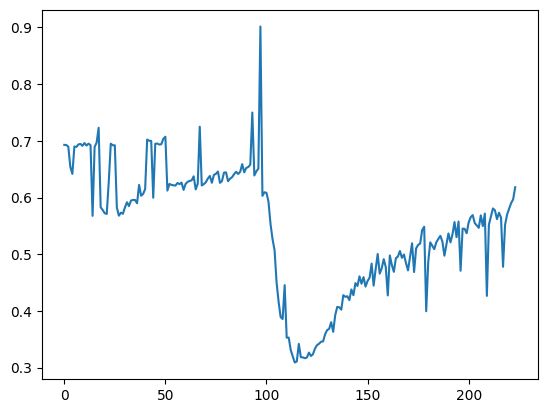

In [55]:
plt.plot(vv[:224])

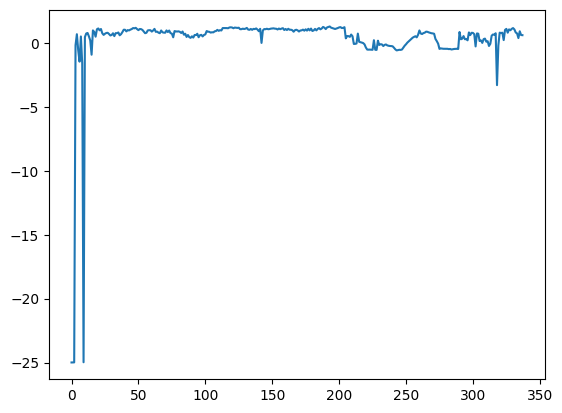

In [12]:
ma=[]
for i in range(len(maxi)):
    ma.append(maxi[i][1])
plt.plot(ma)

In [13]:
m=[]
with open('LSTM3/vloss.pkl','rb') as f:
    m=pickle.load(f)

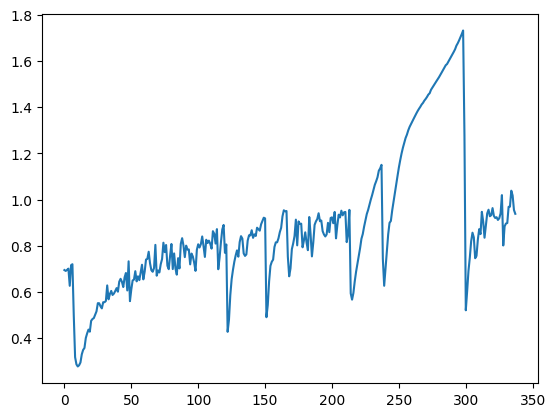

In [14]:
plt.plot(m[0:len(ma)])